In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv")
df = df.drop(columns=['Unnamed: 0'])
df.shape

(8185, 15)

In [7]:
df.head()

,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure
0,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,Construction,In-Progress,07/07/2016,03/28/2018,NaN,4050000,4229193.0,3791127.0,"DSF: 0000821031, 0000822210",False
1,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,"CM, F&E",In-Progress,07/07/2016,03/28/2018,NaN,252000,489326.0,485620.0,"DSF: 0000821031, 0000822210",False
2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,07/27/2017,11/27/2017,08/03/2017,0,1792.0,1792.0,DSF: 0000823560,False
3,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Design,In-Progress,08/04/2017,02/05/2018,NaN,19110,17318.0,7169.0,DSF: 0000823560,True
4,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Construction,PNS,PNS,PNS,PNS,280280,280280.0,951.0,DSF: 0000823560,False


In [8]:
df.columns

Index(['project_geographic_district', 'project_building_identifier',
       'project_school_name', 'project_type', 'project_description',
       'project_phase_name', 'project_status_name',
       'project_phase_actual_start_date', 'project_phase_planned_end_date',
       'project_phase_actual_end_date', 'project_budget_amount',
       'final_estimate_of_actual_costs_through_end_of_phase_amount',
       'total_phase_actual_spending_amount', 'dsf_number_s', 'failure'],
      dtype='object')

In [9]:
df.dtypes.sort_values()

failure                                                          bool
project_geographic_district                                     int64
final_estimate_of_actual_costs_through_end_of_phase_amount    float64
total_phase_actual_spending_amount                            float64
project_building_identifier                                    object
project_school_name                                            object
project_type                                                   object
project_description                                            object
project_phase_name                                             object
project_status_name                                            object
project_phase_actual_start_date                                object
project_phase_planned_end_date                                 object
project_phase_actual_end_date                                  object
project_budget_amount                                          object
dsf_number_s        

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8185 entries, 0 to 8184
Data columns (total 15 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   project_geographic_district                                 8185 non-null   int64  
 1   project_building_identifier                                 8185 non-null   object 
 2   project_school_name                                         8185 non-null   object 
 3   project_type                                                8185 non-null   object 
 4   project_description                                         8185 non-null   object 
 5   project_phase_name                                          8184 non-null   object 
 6   project_status_name                                         8185 non-null   object 
 7   project_phase_actual_start_date                             8185 non-null   object 
 8 

## Failure

In [13]:
counts = df['failure'].value_counts()
counts

failure
False    6979
True     1206
Name: count, dtype: int64

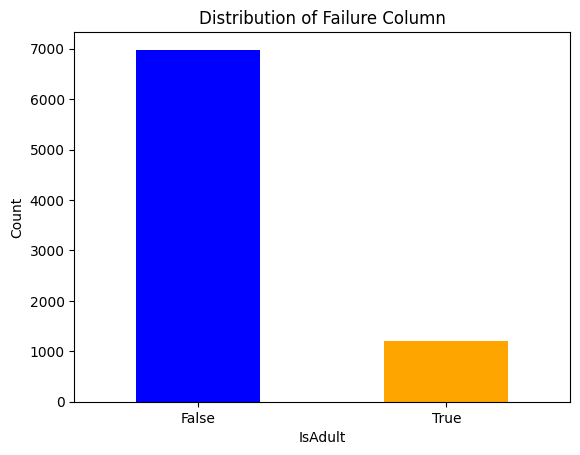

In [17]:
# Plotting as a bar chart
# plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Failure Column')
plt.xlabel('IsAdult')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Project Geographic District

In [18]:
df['project_geographic_district'].head()

0    10
1    10
2    10
3    10
4    10
Name: project_geographic_district, dtype: int64

In [25]:
counts = df['project_geographic_district'].value_counts()
counts

project_geographic_district
31    619
2     424
22    355
10    350
27    338
28    326
21    320
15    305
24    304
3     283
20    277
6     274
25    264
30    258
26    250
9     246
19    236
11    235
18    234
8     234
29    229
13    221
17    207
14    200
32    175
23    171
5     157
12    156
4     146
16    145
7     141
1     105
Name: count, dtype: int64

In [24]:
df['project_geographic_district'].unique()

array([10,  2, 11,  3, 25,  4, 15,  5, 16,  6, 12, 13,  7,  8, 14,  9,  1,
       18, 30, 24, 19, 31, 20, 26, 21, 27, 22, 28, 23, 29, 17, 32])

<Axes: xlabel='project_geographic_district'>

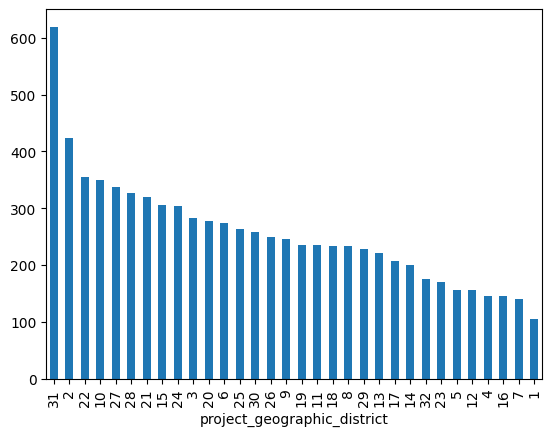

In [28]:
counts.plot(kind='bar')
# plt.xticks(rotation=0)

In [29]:
# Find null values
df['project_geographic_district'].isnull().sum()

0

## final_estimate_of_actual_costs_through_end_of_phase_amount

In [30]:
df['final_estimate_of_actual_costs_through_end_of_phase_amount'].head()

0    4229193.0
1     489326.0
2       1792.0
3      17318.0
4     280280.0
Name: final_estimate_of_actual_costs_through_end_of_phase_amount, dtype: float64

In [32]:
df[df['final_estimate_of_actual_costs_through_end_of_phase_amount'].isnull()]

,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure
267,10,X843,P.S. 246 - BRONX,DIIT - Project Conne,CLASSROOM CONNECTIVITY,Purch & Install,In-Progress,07/01/2016,07/01/2017,NaN,DIIT,NaN,0.0,DSF: 0000800265,True
2180,8,X060,THE LONGWOOD ACADEMY FOR DISCO,DIIT - Project Conne,CLASSROOM CONNECTIVITY,Purch & Install,In-Progress,07/01/2016,07/01/2017,NaN,DIIT,NaN,0.0,DSF: 0000800217,True
2886,9,X132,P.S. 132 - BRONX,DIIT - Project Conne,CLASSROOM CONNECTIVITY,Purch & Install,In-Progress,07/01/2016,07/01/2017,NaN,DIIT,NaN,0.0,DSF: 0000800237,True
8049,32,K116,P.S. 116 - BROOKLYN,DIIT - Project Conne,CLASSROOM CONNECTIVITY,Purch & Install,In-Progress,07/01/2016,07/01/2017,NaN,DIIT,NaN,0.0,DSF: 0000776738,True


In [34]:
df['final_estimate_of_actual_costs_through_end_of_phase_amount'].describe().apply(lambda x: format(x, 'f'))

count         8181.000000
mean       1185589.680601
std        6300405.825943
min              0.000000
25%          18419.000000
50%          80309.000000
75%         264000.000000
max      115006550.000000
Name: final_estimate_of_actual_costs_through_end_of_phase_amount, dtype: object

In [37]:
df['final_estimate_of_actual_costs_through_end_of_phase_amount'].value_counts()

final_estimate_of_actual_costs_through_end_of_phase_amount
0.0         458
6000.0      103
9000.0       91
170000.0     85
30000.0      71
           ... 
243349.0      1
14706.0       1
116301.0      1
99003.0       1
435279.0      1
Name: count, Length: 5730, dtype: int64

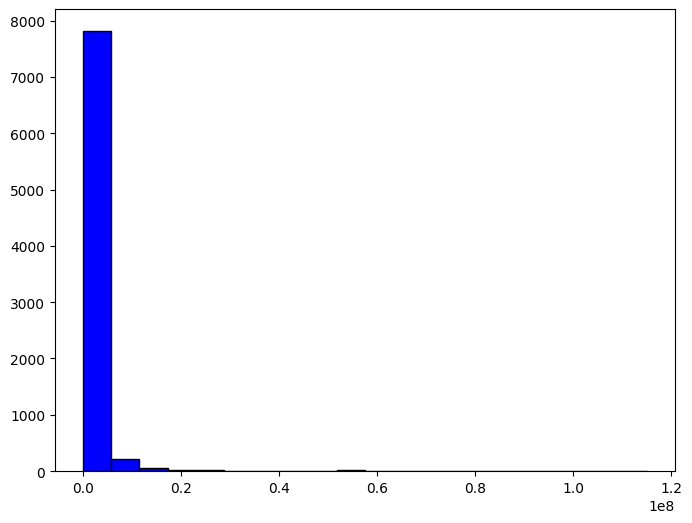

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(df['final_estimate_of_actual_costs_through_end_of_phase_amount'], bins=20, color='blue', edgecolor='black')
plt.show()

In [42]:
without_zeroes = df[df['final_estimate_of_actual_costs_through_end_of_phase_amount'] != 0]

In [44]:
without_zeroes['final_estimate_of_actual_costs_through_end_of_phase_amount'].value_counts()

final_estimate_of_actual_costs_through_end_of_phase_amount
6000.0      103
9000.0       91
170000.0     85
30000.0      71
15000.0      59
           ... 
243349.0      1
14706.0       1
116301.0      1
99003.0       1
435279.0      1
Name: count, Length: 5729, dtype: int64

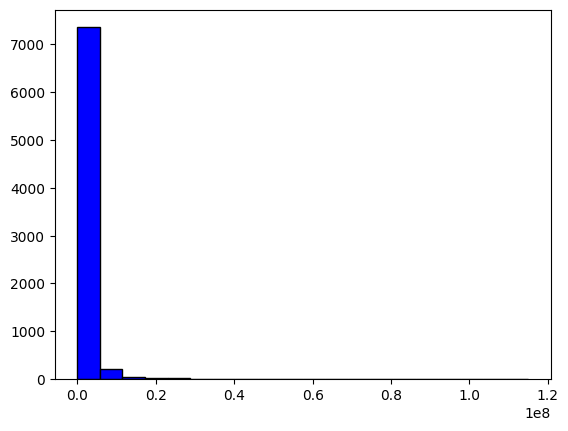

In [40]:
plt.hist(without_zeroes['final_estimate_of_actual_costs_through_end_of_phase_amount'], bins=20, color='blue', edgecolor='black')
plt.show()

In [48]:
sorted = df['final_estimate_of_actual_costs_through_end_of_phase_amount'].sort_values()
sorted.iloc[-20]

79103198.0

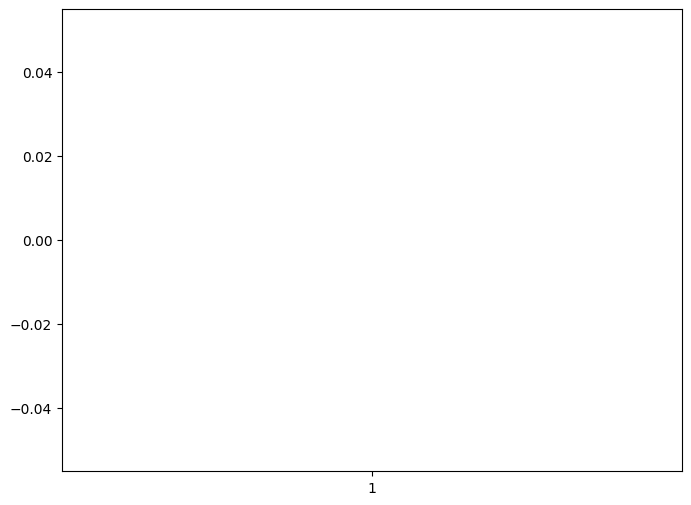

In [50]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['final_estimate_of_actual_costs_through_end_of_phase_amount'])
plt.show()

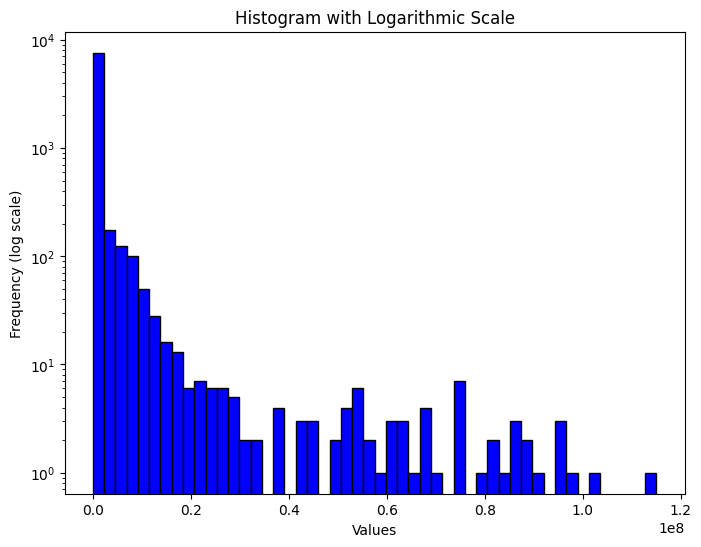

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(df['final_estimate_of_actual_costs_through_end_of_phase_amount'], bins=50, color='blue', edgecolor='black')
plt.yscale('log')
plt.title('Histogram with Logarithmic Scale')
plt.xlabel('Values')
plt.ylabel('Frequency (log scale)')
plt.show()

# Total Phase Spending Amount

In [53]:
df['total_phase_actual_spending_amount'].head()

0    3791127.0
1     485620.0
2       1792.0
3       7169.0
4        951.0
Name: total_phase_actual_spending_amount, dtype: float64

In [54]:
df['total_phase_actual_spending_amount'].describe().apply(lambda x: format(x, 'f'))

count        8185.000000
mean       409109.050336
std       3255846.452696
min             0.000000
25%             0.000000
50%          6762.000000
75%         79396.000000
max      79347056.000000
Name: total_phase_actual_spending_amount, dtype: object

In [55]:
df['total_phase_actual_spending_amount'].isnull().sum()

0

In [57]:
df['total_phase_actual_spending_amount'].corr(df['final_estimate_of_actual_costs_through_end_of_phase_amount'])

0.6304870091891708

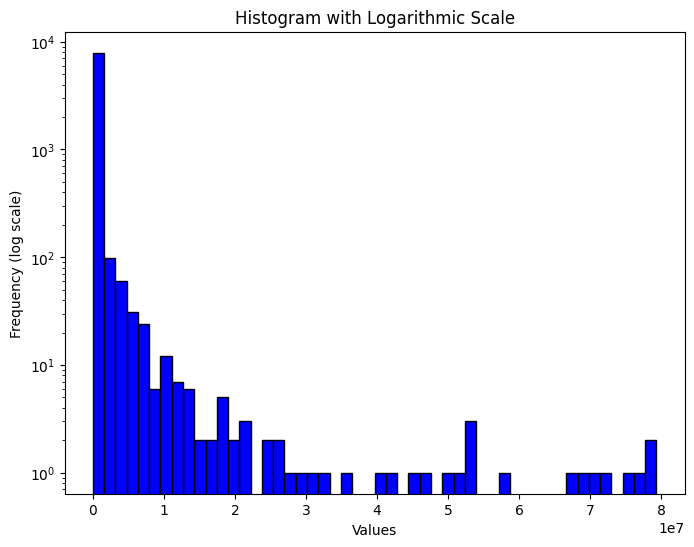

In [58]:
plt.figure(figsize=(8, 6))
plt.hist(df['total_phase_actual_spending_amount'], bins=50, color='blue', edgecolor='black')
plt.yscale('log')
plt.title('Histogram with Logarithmic Scale')
plt.xlabel('Values')
plt.ylabel('Frequency (log scale)')
plt.show()

Project Buildigin dientifier    

In [62]:
df['project_building_identifier'].value_counts()

project_building_identifier
M470    34
Q465    31
K480    31
R043    31
K136    30
        ..
Q315     1
M146     1
Q290     1
M107     1
K842     1
Name: count, Length: 1196, dtype: int64

In [70]:
df['project_building_identifier'].value_counts().value_counts()

count
4     184
1     169
5     122
6      99
8      93
2      67
9      66
10     63
7      59
11     46
3      44
12     37
14     34
13     32
15     15
16     12
18     11
17      8
19      8
23      4
31      3
20      3
22      3
25      3
26      3
27      2
21      1
24      1
28      1
29      1
30      1
34      1
Name: count, dtype: int64

In [68]:
df['project_building_identifier'].nunique()

1196

In [69]:
df['project_building_identifier'].isnull().sum()

0

<Axes: xlabel='project_building_identifier'>

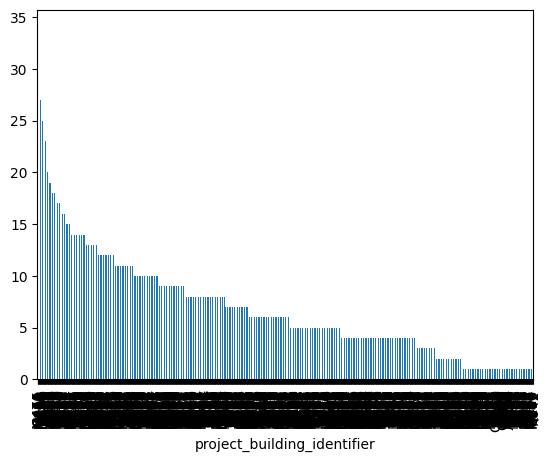

In [67]:
df['project_building_identifier'].value_counts().plot(kind='bar')

project school name

In [74]:
df['project_school_name'].isnull().sum()

0

In [73]:
df['project_school_name'].value_counts()

project_school_name
BROOKLYN TECH HS - K              30
P.S. 198 - MANHATTAN              25
DEWITT CLINTON HS - X             25
AUGUST MARTIN HS - QUEENS         25
NEW DORP HS - STATEN ISLAND       23
                                  ..
ROCKAWAY COLLEGIATE HIGH SCHOO     1
ROCKAWAY PARK HIGH SCHOOL FOR      1
I.S. 33 - BROOKLYN                 1
BEGINNING WITH CHILDREN CHARTE     1
I.S. 230 - QUEENS                  1
Name: count, Length: 1483, dtype: int64

In [75]:
df['project_school_name'].value_counts().value_counts()

count
1     294
4     286
5     166
2     122
6     110
8     104
9      71
10     64
7      51
3      42
11     35
12     34
13     30
14     21
15     14
16     11
17      8
18      6
19      4
22      4
25      3
20      1
23      1
30      1
Name: count, dtype: int64

In [78]:
df[df['project_school_name'] == 'BROOKLYN TECH HS - K'].head()

,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure
2015,13,K430,BROOKLYN TECH HS - K,SCA CIP,LOW VOLT ELEC SYS/KITCHEN FIRE SUPRESSION SYS,Scope,Complete,02/28/2013,05/29/2013,07/24/2013,77238,66703.0,66703.0,"DSF: 0000760755, 0000777292",False
2016,13,K430,BROOKLYN TECH HS - K,SCA CIP,LOW VOLT ELEC SYS/KITCHEN FIRE SUPRESSION SYS,Design,Complete,08/21/2013,02/27/2014,09/04/2014,300370,399990.0,354172.0,"DSF: 0000760755, 0000777292",False
2017,13,K430,BROOKLYN TECH HS - K,SCA CIP,LOW VOLT ELEC SYS/KITCHEN FIRE SUPRESSION SYS,Construction,In-Progress,11/24/2014,02/16/2016,NaN,4861703,5947877.0,5246866.0,"DSF: 0000760755, 0000777292",False
2018,13,K430,BROOKLYN TECH HS - K,SCA CIP,LOW VOLT ELEC SYS/KITCHEN FIRE SUPRESSION SYS,"CM, F&E",In-Progress,11/24/2014,02/16/2016,NaN,472010,762944.0,744309.0,"DSF: 0000760755, 0000777292",False
2019,13,K430,BROOKLYN TECH HS - K,SCA CIP,EXTERIOR MASONRY/ROOFS/PARAPETS/WINDOWS/PAVED ...,Scope,Complete,04/13/2016,08/26/2016,02/23/2017,283508,227859.0,203766.0,"DSF: 0000828949, 0000850828, 0000850833, 00008...",False


In [79]:
df[df['project_school_name'] == 'P.S. 198 - MANHATTAN'].head()

,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure
3224,2,M198,P.S. 198 - MANHATTAN,SCA CIP,WINDOWS/ROOFS/PARAPETS,Scope,Complete,02/13/2014,06/30/2014,08/14/2014,124905,93414.0,93414.0,"DSF: 0000786768, 0000786769, 0000786770",False
3225,2,M198,P.S. 198 - MANHATTAN,SCA CIP,WINDOWS/ROOFS/PARAPETS,Design,Complete,10/01/2014,03/09/2015,04/06/2016,494872,382890.0,320192.0,"DSF: 0000786768, 0000786769, 0000786770",False
3226,2,M198,P.S. 198 - MANHATTAN,SCA CIP,WINDOWS/ROOFS/PARAPETS,Construction,In-Progress,05/15/2017,11/05/2018,NaN,8852502,8038026.0,318024.0,"DSF: 0000786768, 0000786769, 0000786770",False
3227,2,M198,P.S. 198 - MANHATTAN,SCA CIP,WINDOWS/ROOFS/PARAPETS,"CM, F&E",In-Progress,05/15/2017,11/05/2018,NaN,644650,105364.0,105011.0,"DSF: 0000786768, 0000786769, 0000786770",False
3228,2,M198,P.S. 198 - MANHATTAN,SCA CIP RESOA,FY16 RESO A CAFETERIA UPGRADE,Scope,Complete,01/08/2016,05/10/2016,03/18/2016,0,8861.0,8861.0,DSF: 0000822316,False


project type

In [80]:
df['project_type']

0                    SCA CIP
1                    SCA CIP
2              SCA CIP RESOA
3              SCA CIP RESOA
4              SCA CIP RESOA
                ...         
8180    DOE - Skilled Trades
8181                 SCA CIP
8182                 SCA CIP
8183                 SCA CIP
8184                 SCA CIP
Name: project_type, Length: 8185, dtype: object

In [82]:
df['project_type'].isnull().sum()

0

In [81]:
df['project_type'].value_counts()

project_type
SCA CIP RESOA           2848
SCA CIP                 2604
SCA IEH                  652
DIIT - RESOA             473
DOE - Skilled Trades     339
DOE- RESOA               252
SCA Capacity             244
DIIT - Project Conne     195
DOE - Lead Paint         113
Trust For Public Lan     107
SCA Furniture & Equi      78
SCA Emergency Lighti      72
Fast Track Projects       60
PRE-K                     56
SCA Lease Site Impro      44
DIIT - PBX Telephone      28
DCAS/NYPA                 10
RCT CIP                    5
SCA Emergency Respon       4
DOE Managed PREK           1
Name: count, dtype: int64

In [84]:
df[df['project_type'] == 'SCA CIP RESOA']['failure'].value_counts()

failure
False    2335
True      513
Name: count, dtype: int64

In [85]:
df[df['project_type'] == 'SCA CIP']['failure'].value_counts()

failure
False    2377
True      227
Name: count, dtype: int64

project description

In [91]:
counts = df['project_description'].value_counts()
counts

project_description
FY18 RESO A MOBILE SCIENCE LAB                      473
FY17 RESO A TECHNOLOGY                              450
FY18 RESO A AUDITORIUM  UPGRADE                     276
FY18 RESO A PLAYGROUNDS                             208
IP DIGITAL VIDEO SURVEILLANCE SYSTEM                204
                                                   ... 
IEH PO18-RMS 304,307,309,317 & 318                    1
REPLACEMENT OF COOLING TOWERS                         1
VACUUM PUMP SYSTEM REPLACEMENT                        1
IEH PO18-NEW WING CORRIDORS ON 2ND FLR & 1ST FLR      1
IEH PO18-LOBBY                                        1
Name: count, Length: 1363, dtype: int64

In [89]:
df['project_description'].head()

0                                       FACADE/ROOFS
1                                       FACADE/ROOFS
2    FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION
3    FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION
4    FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION
Name: project_description, dtype: object

<Axes: xlabel='project_description'>

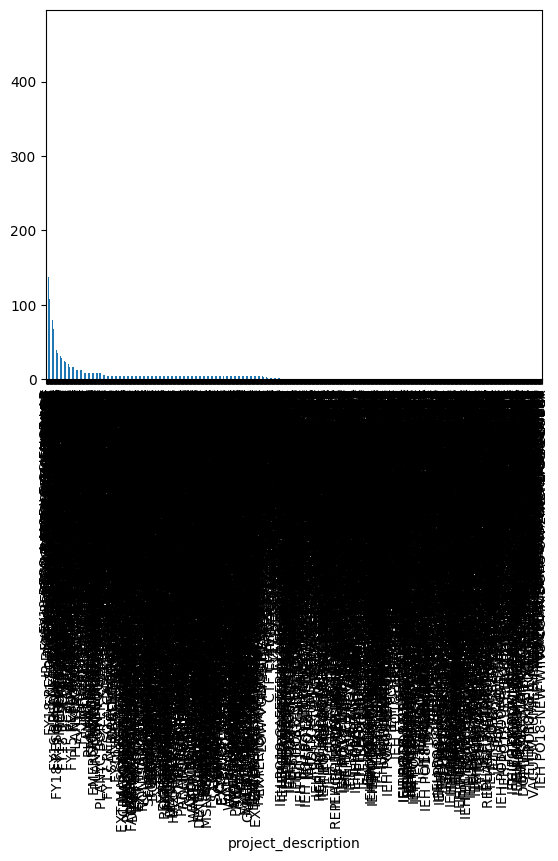

In [93]:
df['project_description'].value_counts().plot(kind='bar')

project phase name

In [94]:
df['project_phase_name']

0       Construction
1            CM, F&E
2              Scope
3             Design
4       Construction
            ...     
8180    Construction
8181           Scope
8182          Design
8183    Construction
8184         CM, F&E
Name: project_phase_name, Length: 8185, dtype: object

In [95]:
df['project_phase_name'].value_counts()

project_phase_name
Construction       2927
Scope              1495
Design             1495
CM, F&E            1389
Purch & Install     695
F&E                 104
CM,Art,F&E           61
CM                   18
Name: count, dtype: int64

project status name

In [96]:
df['project_status_name']

0       In-Progress
1       In-Progress
2          Complete
3       In-Progress
4               PNS
           ...     
8180    In-Progress
8181       Complete
8182    In-Progress
8183            PNS
8184            PNS
Name: project_status_name, Length: 8185, dtype: object

In [98]:
df['project_status_name'].value_counts()

project_status_name
PNS            3046
Complete       2981
In-Progress    2158
Name: count, dtype: int64

project phsae actual date

In [121]:
def convert_to_datetime(value):
    if value == 'PNS':
        return value
    try:
        return pd.to_datetime(value)
    except ValueError:
        print(value)
        return value
    
df['project_phase_actual_start_date'] = df['project_phase_actual_start_date'].apply(convert_to_datetime)

FTK


In [122]:
df['project_phase_actual_start_date'].head()

0    2016-07-07 00:00:00
1    2016-07-07 00:00:00
2    2017-07-27 00:00:00
3    2017-08-04 00:00:00
4                    PNS
Name: project_phase_actual_start_date, dtype: object

In [123]:
df['project_phase_actual_start_date'].value_counts()

project_phase_actual_start_date
PNS                    3045
2013-06-24 00:00:00     195
2017-05-15 00:00:00      63
2017-08-14 00:00:00      60
2017-05-08 00:00:00      46
                       ... 
2015-04-03 00:00:00       1
2016-03-04 00:00:00       1
2017-09-02 00:00:00       1
2014-03-24 00:00:00       1
2013-06-18 00:00:00       1
Name: count, Length: 1069, dtype: int64

In [126]:
not_pns = df[~df['project_phase_actual_start_date'].isin(['PNS', 'FTK'])]

/tmp/ipykernel_21015/2399253849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_pns['project_phase_actual_start_date'] = pd.to_datetime(not_pns['project_phase_actual_start_date'])


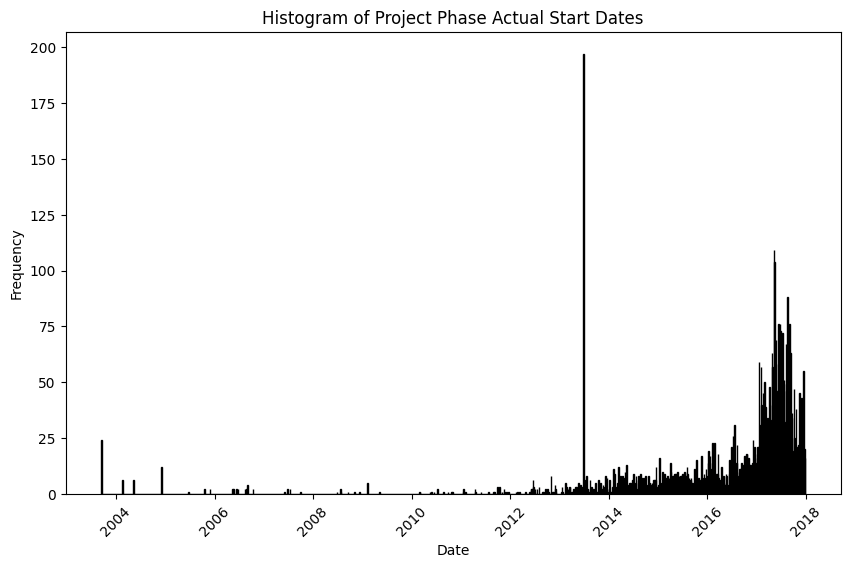

In [127]:
# Convert 'project_phase_actual_start_date' to datetime
not_pns['project_phase_actual_start_date'] = pd.to_datetime(not_pns['project_phase_actual_start_date'])

# Plotting histogram with dates
plt.figure(figsize=(10, 6))
plt.hist(not_pns['project_phase_actual_start_date'], bins=len(not_pns['project_phase_actual_start_date'].unique()), edgecolor='black')

plt.title('Histogram of Project Phase Actual Start Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [131]:
recent = not_pns[not_pns['project_phase_actual_start_date'] > '2014-01-01']

/tmp/ipykernel_21015/3367059039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent['project_phase_actual_start_date'] = pd.to_datetime(recent['project_phase_actual_start_date'])


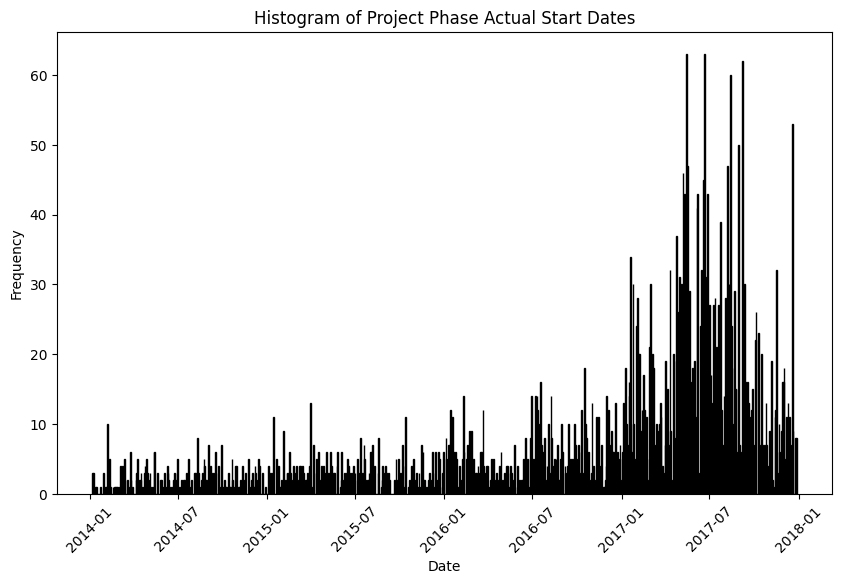

In [132]:
# Convert 'project_phase_actual_start_date' to datetime
recent['project_phase_actual_start_date'] = pd.to_datetime(recent['project_phase_actual_start_date'])

# Plotting histogram with dates
plt.figure(figsize=(10, 6))
plt.hist(recent['project_phase_actual_start_date'], bins=len(recent['project_phase_actual_start_date'].unique()), edgecolor='black')

plt.title('Histogram of Project Phase Actual Start Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

project budget amount

In [134]:
df['project_budget_amount'].head()

0    4050000
1     252000
2          0
3      19110
4     280280
Name: project_budget_amount, dtype: object

In [135]:
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        print(value)
        return value

df['project_budget_amount'] = df['project_budget_amount'].apply(convert_to_float)

PNB
PNB
PNB
PNB
DOES
IEH
IEH
IEH
DOEL
DOES
DOES
IEH
IEH
DOES
IEH
DIIX
IEH
DOES
IEH
DIIT
IEH
DIIT
DIIT
IEH
IEH
IEH
IEH
DIIT
DIIT
IEH
DIIT
FTK
IEH
IEH
IEH
DOES
DOES
DOES
IEH
DOES
IEH
IEH
DIIT
IEH
DIIT
IEH
IEH
IEH
DOES
IEH
DOES
IEH
DOEL
DOES
IEH
IEH
IEH
IEH
IEH
IEH
PNB
IEH
IEH
IEH
IEH
IEH
IEH
IEH
IEH
FTK
IEH
DOEL
DOES
IEH
IEH
IEH
IEH
DOES
DOES
IEH
DOES
IEH
IEH
IEH
IEH
IEH
IEH
IEH
IEH
IEH
IEH
IEH
IEH
IEH
IEH
DOES
DIIT
DIIT
DOES
IEH
IEH
DOES
FTK
IEH
DOES
DIIT
DOES
DIIT
IEH
IEH
IEH
DOES
DIIT
DIIT
IEH
FTK
IEH
DOES
IEH
DOES
IEH
IEH
IEH
IEH
IEH
IEH
IEH
IEH
IEH
DIIT
DOES
IEH
IEH
IEH
DIIT
IEH
IEH
DIIT
IEH
IEH
IEH
DIIT
DOES
IEH
IEH
IEH
IEH
FTK
FTK
DOEL
DOEL
DOEL
DOEL
DOEL
DOES
IEH
IEH
IEH
IEH
DIIX
DIIT
DOES
IEH
DIIT
IEH
IEH
DIIT
DIIT
IEH
DIIT
IEH
DIIT
DOES
IEH
DOES
IEH
IEH
DOES
DIIT
DIIT
IEH
IEH
DIIT
DIIT
IEH
DOES
DOES
FTK
DOES
DIIT
DIIT
IEH
FTK
IEH
DOES
IEH
DOES
DOES
IEH
IEH
DIIX
DOES
FTK
DIIT
DOES
DIIT
DOES
DIIT
FTK
IEH
IEH
DOEL
DOEL
IEH
DOES
IEH
IEH
FTK
DIIT
DOEL
DOES
DIIX
DOES
DOEL
DIIT
DIIT
D

In [136]:
only_floats = df[df['project_budget_amount'].apply(lambda x: isinstance(x, float))]

In [137]:
only_floats.shape

(6744, 15)

In [138]:
df['project_budget_amount'].shape

(8185,)

In [142]:
only_floats['project_budget_amount'].describe()

count     6744.0
unique    3605.0
top          0.0
freq       717.0
Name: project_budget_amount, dtype: float64

(array([5.143e+03, 5.670e+02, 1.980e+02, 1.070e+02, 7.600e+01, 5.500e+01,
        3.500e+01, 2.800e+01, 2.000e+01, 2.400e+01, 3.200e+01, 2.000e+01,
        2.000e+01, 2.400e+01, 1.400e+01, 2.300e+01, 2.800e+01, 2.400e+01,
        2.500e+01, 2.300e+01, 1.200e+01, 9.000e+00, 1.000e+01, 1.200e+01,
        1.400e+01, 1.300e+01, 1.100e+01, 4.000e+00, 7.000e+00, 8.000e+00,
        6.000e+00, 6.000e+00, 6.000e+00, 1.000e+01, 1.000e+00, 3.000e+00,
        6.000e+00, 1.000e+00, 5.000e+00, 2.000e+00, 4.000e+00, 1.000e+00,
        7.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00]),
 array([       0.  ,   396915.78,   793831.56,  1190747.34,  1587663.12,
         1984578.9 ,  2381494.68,  2778410.46,  3175326.24,  3572242.02,
         3969157.8 ,  4366073.58,  4762989.36,  5159905.14,  5556820.92,
         5953736.7 ,  6350652.48,  6747568.26,  7144484.04,  7541399.82,
         7938315.6 ,  8335231.38,  8732147.16,  9129062.94,  9525978.72,
         99

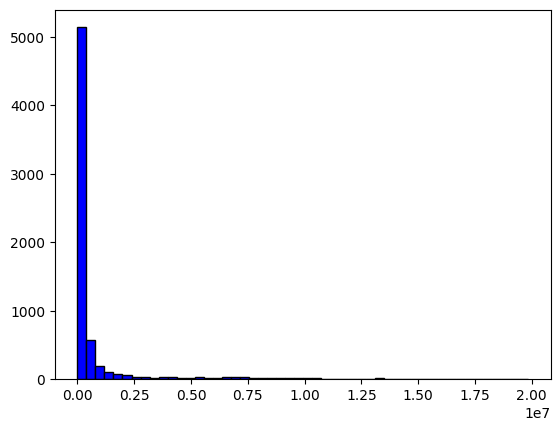

In [149]:
plt.hist(only_floats[only_floats['project_budget_amount'] < 20000000]['project_budget_amount'], bins=50, color='blue', edgecolor='black')

In [140]:
df['project_budget_amount'].value_counts()

project_budget_amount
0.0          717
IEH          652
DOES         339
DIIT         195
35000.0      152
            ... 
2160000.0      1
134400.0       1
28140.0        1
103180.0       1
435279.0       1
Name: count, Length: 3613, dtype: int64

end dates

In [152]:
df['project_phase_actual_end_date'].value_counts()

project_phase_actual_end_date
PNS           3045
05/15/2017      29
10/05/2017      23
08/01/2017      21
09/06/2017      21
              ... 
07/20/2016       1
11/21/2016       1
10/18/2012       1
12/19/2014       1
11/18/2013       1
Name: count, Length: 888, dtype: int64

In [153]:
df['project_phase_planned_end_date'].value_counts()

project_phase_planned_end_date
PNS           3045
IEH            652
DOES           318
01/15/2018     259
12/31/2013     191
              ... 
04/27/2017       1
01/13/2017       1
12/19/2017       1
05/23/2016       1
05/22/2014       1
Name: count, Length: 1168, dtype: int64

In [158]:
df['project_phase_actual_end_date'].isna().sum()

2158

In [159]:
df['project_phase_planned_end_date'].isna().sum()

0

dsf_number

In [160]:
df['dsf_number_s']

0       DSF: 0000821031, 0000822210
1       DSF: 0000821031, 0000822210
2                   DSF: 0000823560
3                   DSF: 0000823560
4                   DSF: 0000823560
                   ...             
8180                DSF: 0000851654
8181                DSF: 0000776207
8182                DSF: 0000776207
8183                DSF: 0000776207
8184                DSF: 0000776207
Name: dsf_number_s, Length: 8185, dtype: object

In [161]:
df.head()

,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure
0,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,Construction,In-Progress,2016-07-07 00:00:00,03/28/2018,NaN,4050000.0,4229193.0,3791127.0,"DSF: 0000821031, 0000822210",False
1,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,"CM, F&E",In-Progress,2016-07-07 00:00:00,03/28/2018,NaN,252000.0,489326.0,485620.0,"DSF: 0000821031, 0000822210",False
2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,2017-07-27 00:00:00,11/27/2017,08/03/2017,0.0,1792.0,1792.0,DSF: 0000823560,False
3,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Design,In-Progress,2017-08-04 00:00:00,02/05/2018,NaN,19110.0,17318.0,7169.0,DSF: 0000823560,True
4,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Construction,PNS,PNS,PNS,PNS,280280.0,280280.0,951.0,DSF: 0000823560,False
